In [1]:
from utz import *
from IPython.display import HTML, SVG, display

import fiona
import geopandas as gpd
from geopy import distance
import shapefile
from shapely.geometry import Point

import plotly.express as px
import plotly.graph_objects as go

import sys
sys.executable

'/opt/homebrew/Caskroom/mambaforge/base/envs/geopandas/bin/python'

## Mapbox configs

In [2]:
token = open(".mapbox-token").read()
mapbox = dict(mapbox=dict(
    style="dark",
    accesstoken=token,
))

## All roads (SRIs, MPs)

In [3]:
fiona.listlayers('NJ_Roadway_Network.gdb')

['NJ_Roadway_Network']

In [4]:
r1 = gpd.read_file('NJ_Roadway_Network_Shapefile/NJ_Roadway_Network.shp')
r1

,OBJECTID,SRI,MP_START,MP_END,DIRECTION,SLD_NAME,MEASURED_L,PARENT_SRI,PARENT_MP_,PARENT_MP1,ACTIVE,YEAR_ACTIV,YEAR_RETIR,ROUTE_SUBT,ROAD_NUM,SRI_OLD,created_us,created_da,last_edite,last_edi_1,Shape_Leng,geometry
0,1,00000001__A100080,0.00,0.171,NaN,FR US 1 NB to RT 33,0.171,00000001__,0.80,0.80,Y,NaN,NaN,8,NaN,00000001__A100080,NaN,NaN,NaN,NaN,1286.731049,"LINESTRING (419915.520 503314.580, 419962.623 ..."
1,2,00000001__A100130,0.00,0.097,NaN,FR US 1 NB to PERRY ST,0.097,00000001__,1.30,1.30,Y,NaN,NaN,8,NaN,00000001__A100130,NaN,NaN,NaN,NaN,737.881509,"LINESTRING (419946.130 506185.230, 419942.076 ..."
2,3,00000001__A100250,0.00,0.111,NaN,FR US 1 NB to MULBERRY ST,0.111,00000001__,2.50,2.50,Y,NaN,NaN,8,NaN,00000001__A100250,NaN,NaN,NaN,NaN,1034.788477,"LINESTRING (423852.380 511259.420, 423967.994 ..."
3,4,00000001__A100360,0.00,0.105,NaN,FR US 1 NB to CO 616,0.105,00000001__,3.60,3.60,Y,NaN,NaN,8,NaN,00000001__A100360,NaN,NaN,NaN,NaN,798.048702,"LINESTRING (428120.450 515110.790, 428145.283 ..."
4,5,00000001__A100760,0.00,0.022,NaN,US 1 NB to QUAKERBRIDGE MALL,0.022,00000001__,7.60,7.60,Y,NaN,NaN,8,NaN,00000001__A100760,NaN,NaN,NaN,NaN,258.335463,"LINESTRING (440305.750 531297.550, 440351.201 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105819,105820,00000007__,0.00,5.290,South to North,NJ 7,5.290,00000007__,5.29,0.00,Y,NaN,NaN,3,7,00000007__,NaN,NaN,NaN,NaN,27958.093338,"LINESTRING (609998.074 694473.708, 609944.064 ..."
105820,105821,00000007__,5.99,10.100,South to North,NJ 7,4.110,00000007__,10.10,5.99,Y,NaN,NaN,3,7,00000007__,NaN,NaN,NaN,NaN,21682.406056,"LINESTRING (587795.430 709676.650, 587860.330 ..."
105821,105822,11021370__,0.00,1.020,NaN,SILVA ST,1.020,11021370__,1.02,0.00,Y,NaN,NaN,7,NaN,11021370,NaN,NaN,NaN,NaN,5369.687387,"LINESTRING (404068.510 517974.310, 404159.710 ..."
105822,105823,13281733__,0.00,0.180,NaN,SILVER LEAF DR,0.180,13281733__,0.18,0.00,Y,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,970.580004,"LINESTRING (558889.766 532823.114, 558956.799 ..."


In [5]:
r2 = gpd.read_file('NJ_Roadway_Network.gdb')
r2

,SRI,MP_START,MP_END,DIRECTION,SLD_NAME,MEASURED_LENGTH,PARENT_SRI,PARENT_MP_START,PARENT_MP_END,ACTIVE,YEAR_ACTIVE,YEAR_RETIRED,ROUTE_SUBTYPE,ROAD_NUM,SRI_OLD,created_user,created_date,last_edited_user,last_edited_date,Shape_Length,geometry
0,00000001__A100080,0.00,0.171000,NaN,FR US 1 NB to RT 33,0.171000,00000001__,0.800000,0.80,Y,NaT,NaT,8,NaN,00000001__A100080,NaN,NaT,NaN,NaT,1286.731049,"MULTILINESTRING ((419915.520 503314.580, 41994..."
1,00000001__A100130,0.00,0.097000,NaN,FR US 1 NB to PERRY ST,0.097000,00000001__,1.300000,1.30,Y,NaT,NaT,8,NaN,00000001__A100130,NaN,NaT,NaN,NaT,737.881509,"MULTILINESTRING ((419946.130 506185.230, 41994..."
2,00000001__A100250,0.00,0.111000,NaN,FR US 1 NB to MULBERRY ST,0.111000,00000001__,2.500000,2.50,Y,NaT,NaT,8,NaN,00000001__A100250,NaN,NaT,NaN,NaT,1034.788477,"MULTILINESTRING ((423852.380 511259.420, 42388..."
3,00000001__A100360,0.00,0.105000,NaN,FR US 1 NB to CO 616,0.105000,00000001__,3.600000,3.60,Y,NaT,NaT,8,NaN,00000001__A100360,NaN,NaT,NaN,NaT,798.048702,"MULTILINESTRING ((428120.450 515110.790, 42813..."
4,00000001__A100760,0.00,0.022000,NaN,US 1 NB to QUAKERBRIDGE MALL,0.022000,00000001__,7.600000,7.60,Y,NaT,NaT,8,NaN,00000001__A100760,NaN,NaT,NaN,NaT,258.335463,"MULTILINESTRING ((440305.750 531297.550, 44031..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105819,00000007__,0.00,5.290000,South to North,NJ 7,5.290000,00000007__,5.290000,0.00,Y,NaT,NaT,3,7,00000007__,NaN,NaT,NaN,NaT,27958.093338,"MULTILINESTRING ((609998.074 694473.708, 60994..."
105820,00000007__,5.99,10.100000,South to North,NJ 7,4.110000,00000007__,10.100000,5.99,Y,NaT,NaT,3,7,00000007__,NaN,NaT,NaN,NaT,21682.406056,"MULTILINESTRING ((587795.430 709676.650, 58786..."
105821,11021370__,0.00,1.020000,NaN,SILVA ST,1.020000,11021370__,1.020000,0.00,Y,NaT,NaT,7,NaN,11021370,NaN,NaT,NaN,NaT,5369.687387,"MULTILINESTRING ((404068.510 517974.310, 40415..."
105822,13281733__,0.00,0.180000,NaN,SILVER LEAF DR,0.180000,13281733__,0.180000,0.00,Y,NaT,NaT,7,NaN,NaN,NaN,NaT,NaN,NaT,970.580004,"MULTILINESTRING ((558889.766 532823.114, 55895..."


In [6]:
r2.crs

<Projected CRS: EPSG:3424>
Name: NAD83 / New Jersey (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New Jersey - counties of Atlantic; Bergen; Burlington; Camden; Cape May; Cumberland; Essex; Gloucester; Hudson; Hunterdon; Mercer; Middlesex; Monmouth; Morris; Ocean; Passaic; Salem; Somerset; Sussex; Union; Warren.
- bounds: (-75.6, 38.87, -73.88, 41.36)
Coordinate Operation:
- name: SPCS83 New Jersey zone (US Survey feet)
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [7]:
r2.crs.name

'NAD83 / New Jersey (ftUS)'

In [8]:
r1.columns[1:] == r2.columns

array([ True,  True,  True,  True,  True, False,  True, False, False,
        True, False, False, False,  True,  True, False, False, False,
       False, False,  True])

### Compare Roadway Network SHP vs GDB

In [9]:
r11 = r1.copy().drop(columns='OBJECTID')
r11.columns = r2.columns.copy()
r11 == r2

,SRI,MP_START,MP_END,DIRECTION,SLD_NAME,MEASURED_LENGTH,PARENT_SRI,PARENT_MP_START,PARENT_MP_END,ACTIVE,YEAR_ACTIVE,YEAR_RETIRED,ROUTE_SUBTYPE,ROAD_NUM,SRI_OLD,created_user,created_date,last_edited_user,last_edited_date,Shape_Length,geometry
0,True,True,False,False,True,False,True,False,False,True,False,False,True,False,True,False,False,False,False,False,False
1,True,True,False,False,True,False,True,False,False,True,False,False,True,False,True,False,False,False,False,False,False
2,True,True,False,False,True,False,True,True,True,True,False,False,True,False,True,False,False,False,False,False,False
3,True,True,False,False,False,False,True,False,False,True,False,False,True,False,True,False,False,False,False,False,False
4,True,True,False,False,True,False,True,False,False,True,False,False,True,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105819,True,True,False,True,True,False,True,False,True,True,False,False,True,True,True,False,False,False,False,False,False
105820,True,False,False,True,True,False,True,False,False,True,False,False,True,True,True,False,False,False,False,False,False
105821,True,True,False,False,True,False,True,False,True,True,False,False,True,False,True,False,False,False,False,False,False
105822,True,True,False,False,True,False,True,False,True,True,False,False,True,False,False,False,False,False,False,False,False


In [10]:
all_sris = r1.SRI.unique()
all_sris

array(['00000001__A100080', '00000001__A100130', '00000001__A100250', ...,
       '11021370__', '13281733__', '00000046__'], dtype=object)

In [11]:
len(all_sris)

105092

## Grove St coordinates, crashes

In [12]:
grove_sri = '09061720__'
grove = r2[r2.SRI.str.contains(grove_sri)]
grove

,SRI,MP_START,MP_END,DIRECTION,SLD_NAME,MEASURED_LENGTH,PARENT_SRI,PARENT_MP_START,PARENT_MP_END,ACTIVE,YEAR_ACTIVE,YEAR_RETIRED,ROUTE_SUBTYPE,ROAD_NUM,SRI_OLD,created_user,created_date,last_edited_user,last_edited_date,Shape_Length,geometry
46228,09061720__,0.0,1.44,North to South,GROVE ST,1.44,09061720__,1.44,0.0,Y,NaT,NaT,7,,09061720,NaN,NaT,NaN,NaT,7630.515214,"MULTILINESTRING ((619459.800 693583.760, 61947..."


In [13]:
grove.crs

<Projected CRS: EPSG:3424>
Name: NAD83 / New Jersey (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New Jersey - counties of Atlantic; Bergen; Burlington; Camden; Cape May; Cumberland; Essex; Gloucester; Hudson; Hunterdon; Mercer; Middlesex; Monmouth; Morris; Ocean; Passaic; Salem; Somerset; Sussex; Union; Warren.
- bounds: (-75.6, 38.87, -73.88, 41.36)
Coordinate Operation:
- name: SPCS83 New Jersey zone (US Survey feet)
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [14]:
g1 = r1[r1.SRI.str.contains(grove_sri)]
g1

,OBJECTID,SRI,MP_START,MP_END,DIRECTION,SLD_NAME,MEASURED_L,PARENT_SRI,PARENT_MP_,PARENT_MP1,ACTIVE,YEAR_ACTIV,YEAR_RETIR,ROUTE_SUBT,ROAD_NUM,SRI_OLD,created_us,created_da,last_edite,last_edi_1,Shape_Leng,geometry
46228,46229,09061720__,0.0,1.44,North to South,GROVE ST,1.44,09061720__,1.44,0.0,Y,NaN,NaN,7,NaN,09061720,NaN,NaN,NaN,NaN,7630.515214,"LINESTRING (619459.800 693583.760, 619471.250 ..."


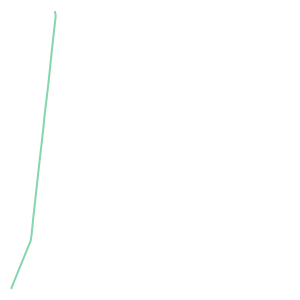

[(619459.7999688275, 693583.7600378245),
 (619471.2500771619, 693531.9501020685),
 (619477.7500641607, 693499.4498389885),
 (619482.0899504945, 693475.6001491547),
 (619482.0899504945, 693451.750131242),
 (619482.0899504945, 693422.4900191575),
 (619473.4098497443, 693350.9599784911),
 (619463.6700398289, 693270.7600076571),
 (619421.4001112469, 692904.4500447363),
 (619410.0398977473, 692796.7599714026),
 (619396.4700429961, 692668.1798479855),
 (619356.9799644947, 692291.9299443215),
 (619339.0298691615, 692120.8800895736),
 (619329.2700461634, 692026.7198448256),
 (619304.4498858303, 691787.4499821588),
 (619293.5099470802, 691681.949865073),
 (619239.8699624948, 691228.4199322388),
 (619236.0799438283, 691196.4101537392),
 (619184.0498641618, 690771.5701241568),
 (619180.4799894132, 690734.6801060736),
 (619153.1201359965, 690451.9198448211),
 (619148.2799225785, 690401.9901546538),
 (619126.2999796607, 690208.1998598203),
 (619100.5998998284, 689981.4998539016),
 (619095.590067327

In [15]:
mls = grove.geometry.values[0]
[ls] = mls.geoms
grove_coords = list(ls.coords)
display(ls)
grove_coords

In [16]:
list(zip(*grove_coords))

[(619459.7999688275,
  619471.2500771619,
  619477.7500641607,
  619482.0899504945,
  619482.0899504945,
  619482.0899504945,
  619473.4098497443,
  619463.6700398289,
  619421.4001112469,
  619410.0398977473,
  619396.4700429961,
  619356.9799644947,
  619339.0298691615,
  619329.2700461634,
  619304.4498858303,
  619293.5099470802,
  619239.8699624948,
  619236.0799438283,
  619184.0498641618,
  619180.4799894132,
  619153.1201359965,
  619148.2799225785,
  619126.2999796607,
  619100.5998998284,
  619095.590067327,
  619066.1600080803,
  619048.5799907446,
  619035.5600036606,
  619006.8599298298,
  618991.1401449963,
  618978.339973744,
  618950.1900956631,
  618942.3699013293,
  618921.2098386623,
  618895.7600864135,
  618892.5501190796,
  618865.8198575787,
  618838.850095246,
  618833.9898687452,
  618827.9898807444,
  618818.819951579,
  618810.1500214115,
  618804.7300847471,
  618794.9000519104,
  618788.4801172465,
  618751.6199547462,
  618687.2998734117,
  618631.31999849

In [17]:
x, y = list(zip(*grove_coords))
gs = gpd.GeoSeries.from_xy(x=x, y=y, crs='EPSG:3424')

In [18]:
gs.crs

<Projected CRS: EPSG:3424>
Name: NAD83 / New Jersey (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New Jersey - counties of Atlantic; Bergen; Burlington; Camden; Cape May; Cumberland; Essex; Gloucester; Hudson; Hunterdon; Mercer; Middlesex; Monmouth; Morris; Ocean; Passaic; Salem; Somerset; Sussex; Union; Warren.
- bounds: (-75.6, 38.87, -73.88, 41.36)
Coordinate Operation:
- name: SPCS83 New Jersey zone (US Survey feet)
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [19]:
grove_lls = gs.to_crs('EPSG:4326')
grove_lls

0     POINT (-74.04048 40.73663)
1     POINT (-74.04044 40.73649)
2     POINT (-74.04041 40.73640)
3     POINT (-74.04040 40.73634)
4     POINT (-74.04040 40.73627)
5     POINT (-74.04040 40.73619)
6     POINT (-74.04043 40.73599)
7     POINT (-74.04047 40.73577)
8     POINT (-74.04063 40.73477)
9     POINT (-74.04067 40.73447)
10    POINT (-74.04072 40.73412)
11    POINT (-74.04087 40.73309)
12    POINT (-74.04094 40.73262)
13    POINT (-74.04098 40.73236)
14    POINT (-74.04107 40.73170)
15    POINT (-74.04111 40.73141)
16    POINT (-74.04131 40.73017)
17    POINT (-74.04133 40.73008)
18    POINT (-74.04152 40.72892)
19    POINT (-74.04154 40.72882)
20    POINT (-74.04164 40.72804)
21    POINT (-74.04166 40.72790)
22    POINT (-74.04174 40.72737)
23    POINT (-74.04184 40.72675)
24    POINT (-74.04186 40.72663)
25    POINT (-74.04197 40.72594)
26    POINT (-74.04204 40.72553)
27    POINT (-74.04209 40.72521)
28    POINT (-74.04219 40.72450)
29    POINT (-74.04225 40.72411)
30    POIN

In [20]:
grove_df = DF(dict(lon=grove_lls.x, lat=grove_lls.y))
grove_df

,lon,lat
0,-74.040477,40.736632
1,-74.040436,40.736490
2,-74.040413,40.736401
3,-74.040398,40.736335
4,-74.040399,40.736270
5,-74.040399,40.736189
6,-74.040432,40.735993
7,-74.040469,40.735773
8,-74.040628,40.734768
9,-74.040671,40.734473


In [ ]:
fig = px.scatter_mapbox(
    grove_df,
    lat='lat', lon='lon',
    center=dict(lon=-74.042037, lat=40.725527),
    zoom=13.5,
    height=600,
)
fig.update_layout(
    **mapbox,
    margin={"r":0,"t":0,"l":0,"b":0},
)
fig.show()

## Grove Crashes

In [22]:
from nj_crashes.crashes import c20

In [23]:
grove_crashes = c20[c20.SRI.str.contains(grove_sri)]
grove_crashes

,County Code,Municipality Code,Department Case Number,County Name,Municipality Name,Police Dept Code,Police Department,Police Station,Total Killed,Total Injured,Pedestrians Killed,Pedestrians Injured,Severity,Intersection,Alcohol Involved,HazMat Involved,Crash Type Code,Total Vehicles Involved,Crash Location,Location Direction,Route,Route Suffix,SRI,MP,Road System,Road Character,Road Horizontal Alignment,Road Grade,Road Surface Type,Surface Condition,Light Condition,Environmental Condition,Road Divided By,Temporary Traffic Control Zone,Distance To Cross Street,Unit Of Measurement,Directn From Cross Street,Cross Street Name,Is Ramp,Ramp To/From Route Name,Ramp To/From Route Direction,Posted Speed,Posted Speed Cross Street,First Harmful Event,Latitude,Longitude,Cell Phone In Use Flag,Other Property Damage,Reporting Badge No.,Date
80141,09,06,14178-20,HUDSON,JERSEY CITY,01,JERSEY CITY PD,EAST,0,0,0,0,P,B,False,False,06,2,GROVE ST / MANILA AVE,,,,09061720__,1.34,07,,01,04,02,01,01,01,01,01,15,FE,N,MONTGOMERY ST,,,,25,25,,NaN,NaN,N,,2934,2020-08-12 17:22:00
80262,09,06,20-000385,HUDSON,JERSEY CITY,01,JERSEY CITY PD,EAST,0,0,0,0,P,I,False,False,02,2,GROVE ST / MANILA AVE,W,,,09061720__,1.29,07,,01,04,02,01,07,01,04,01,,AT,,MERCER ST,,,,25,25,26,NaN,NaN,N,,3009,2020-01-06 18:43:00
80313,09,06,20-000652,HUDSON,JERSEY CITY,01,JERSEY CITY PD,EAST DISTRICT,0,0,0,0,P,I,False,False,03,2,GROVE ST / MANILA AVE,,,,09061720__,0.45,07,,01,04,02,01,01,01,04,01,,AT,,I-78 / 12TH ST,,,,25,25,28,NaN,NaN,N,,3125,2020-01-10 07:42:00
80607,09,06,20-001983,HUDSON,JERSEY CITY,01,JERSEY CITY PD,EAST,0,0,0,0,P,I,False,False,02,2,GROVE ST / MANILA AVE,E,,,09061720__,0.45,07,,01,04,02,01,02,01,05,01,,AT,,I-78 / 12TH ST,,,,25,25,26,NaN,NaN,N,,3325,2020-01-27 06:30:00
80623,09,06,20-002071,HUDSON,JERSEY CITY,01,JERSEY CITY PD,EAST,0,0,0,0,P,B,False,False,06,2,GROVE ST / MANILA AVE,,,,09061720__,1.09,07,,01,04,02,01,07,01,04,01,50,FE,,BAY ST,,,,25,,28,NaN,NaN,N,,3335,2020-01-27 21:18:00
80657,09,06,20-002265,HUDSON,JERSEY CITY,01,JERSEY CITY PD,EAST,0,0,0,0,P,I,False,False,03,2,GROVE ST / MANILA AVE,,,,09061720__,0.45,07,,01,04,01,01,01,01,05,01,,AT,,I-78 / 12TH ST,,,,25,25,26,NaN,NaN,N,,3320,2020-01-30 07:47:00
80925,09,06,20-003397,HUDSON,JERSEY CITY,01,JERSEY CITY PD,EAST DISTRICT,0,1,0,1,I,I,False,False,13,1,GROVE ST / MANILA AVE,,,,09061720__,0.59,07,,01,04,02,02,01,02,05,01,,AT,,9TH ST,,,,25,25,26,NaN,NaN,N,,#280?,2020-02-13 10:41:00
81075,09,06,20-004028,HUDSON,JERSEY CITY,01,JERSEY CITY PD,EAST,0,0,0,0,P,B,False,False,01,2,GROVE ST / MANILA AVE,,,,09061720__,1.09,07,,01,04,01,01,01,01,05,01,100,FE,,BAY ST,,,,25,25,26,NaN,NaN,N,,3320,2020-02-21 09:30:00
81239,09,06,20-004710,HUDSON,JERSEY CITY,01,JERSEY CITY PD,EAST,0,0,0,0,P,I,False,False,02,2,GROVE ST / MANILA AVE,W,,,09061720__,0.34,07,,01,04,02,01,01,01,05,01,,AT,,I-78 / BOYLE PLAZA,,,,25,25,26,NaN,NaN,N,,2900,2020-02-29 12:21:00
81282,09,06,20-004923,HUDSON,JERSEY CITY,01,JERSEY CITY PD,EAST DISTRICT,0,0,0,0,P,B,False,False,02,2,GROVE ST / MANILA AVE,,,,09061720__,1.17,07,,01,04,02,01,01,01,04,01,100,FE,S,C COLUMBUS DR,,,,25,25,26,NaN,NaN,N,,2989,2020-03-03 07:56:00
